
# Lab One: Exploring Table Data

### Dataset: Housing in London
Group: Benjamin Kuo & Nick Benso


GitHub with Jupyter Notebooks: https://www.youtube.com/watch?v=I32iNXjnSpE&ab_channel=RishabhShrestha

### Business Understanding

This dataset is titled "Housing in London." It is a time-series dataset, and it was collected so that people such as real estate investors, the government, and home buyers can get an idea of the trends of home buying and home prices in London and the areas that surround it. This data is useful as discovering trends in the data will allow real estate investors to make better decisions on where to invest, the British and London government to better understand which communities are growing economically and socially and which aren't, and home buyers to make better decisions on buying a home that is safe, affordable, and will increase in value in the future. This data was collected primarily by the London government, which keeps a thorough and daily track on all the variables in the dataset. The primary prediction task will be to predict the number of houses sold. This will help the third parties of the London government and real estate investors get a better idea of which communities are flourishing and which communities are struggling. However, home buyers would be more interested in the mean house price. Therefore, an alternative prediction task would be to predict house price in order to better inform home buyers on where they can afford to buy their next home. To be considered useful to these third parties, the prediction algorithm needs to perform well, but it does not need to perform near perfectly. Given the uses of this data, generally, a regression equation that rejects the null hypothesis of no correlation at alpha = .05 should be sufficient. The data does not involve any super serious or life-threatening matters, so it is not essential that the prediction perform super well. This data is just primarily used as information to give people interested in the housing market an overview of the trends and opportunities in London's housing market in order to help narrow down their areas of interest. There are many other factors that these third parties should consider before making a decision, such as quality of life, general economic trends, etc. 

### Load Dataset and Define Data Types

What data type should be used to represent each data attribute? 
This dataset for housing in London on a monthly basis contains 12 different attributes including: 
- date
- area
- average house price
- code
- houses sold
- number of crimes 
- flag indicating if city is a borough of London

Most of the data is numeric data and should be represented as floats. While the date feature can be used and compared as a string object type, it should be converted to a date data type for ease of use and readability. The area feature is a categorical attribute consisting of 45 different areas in London, meaning that it is nominal data that can be represented with one hot encoding. The code feature is a string object data type and should stay that way as it is a combination of letters and numbers. Lastly, the borough flag feature is a binary data type annd should be represented as a boolean, since it is a flag which is either true or false.

Discuss the attributes collected in the dataset. For datasets with a large number of attributes, only discuss a subset of relevant attributes.  

As the main goal is to predict the housing market for various locations in London, the main attributes of importance likely are: date, area, housing price, houses sold, and amount of crime. It is important to note that the code is essentially the area attribute but encoded so one of these can be removed. Dates can be important as there may be seasonal swings in the housing market, where housing is higher in demand during certain seasons which can affect the prices as well as number sold. The housing prices and houses sold will be crucical to determining the housing market for certain areas. The amount of crime could also be informative, as it may affect public perception of the area and as a result affect prices changes and the number of houses sold. Lastly, the borough flag attribute could be important as it could indicate that the area is more well known or larger, which could potentially affect the overall statistics of the area, but this affect would likely be minimal.


In [66]:
%config Completer.use_jedi = False
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date

df = pd.read_csv('london_housing_monthly.csv') # read in the csv file
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           13549 non-null  object 
 1   area           13549 non-null  object 
 2   average_price  13549 non-null  int64  
 3   code           13549 non-null  object 
 4   houses_sold    13455 non-null  float64
 5   no_of_crimes   7439 non-null   float64
 6   borough_flag   13549 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 741.1+ KB
None


In [26]:
# separate data types
date_features = 'date'
bool_features = 'borough_flag'
numerical_features = ['average_price','houses_sold','no_of_crimes']
area_categories = df['area'].unique()

# define with correct data types
df[date_features] = df[date_features].astype(np.datetime64)
df[bool_features] = df[bool_features].astype(bool)
df[numerical_features] = df[numerical_features].astype(np.float64)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           13549 non-null  datetime64[ns]
 1   area           13549 non-null  object        
 2   average_price  13549 non-null  float64       
 3   code           13549 non-null  object        
 4   houses_sold    13455 non-null  float64       
 5   no_of_crimes   7439 non-null   float64       
 6   borough_flag   13549 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(3), object(2)
memory usage: 648.5+ KB


### Verify data quality
Explain any missing values or duplicate data. 
Visualize entries that are missing/complete for different attributes. 
Are those mistakes? Why do these quality issues exist in the data? How do you deal with these problems? Give justifications for your methods (elimination or imputation).  

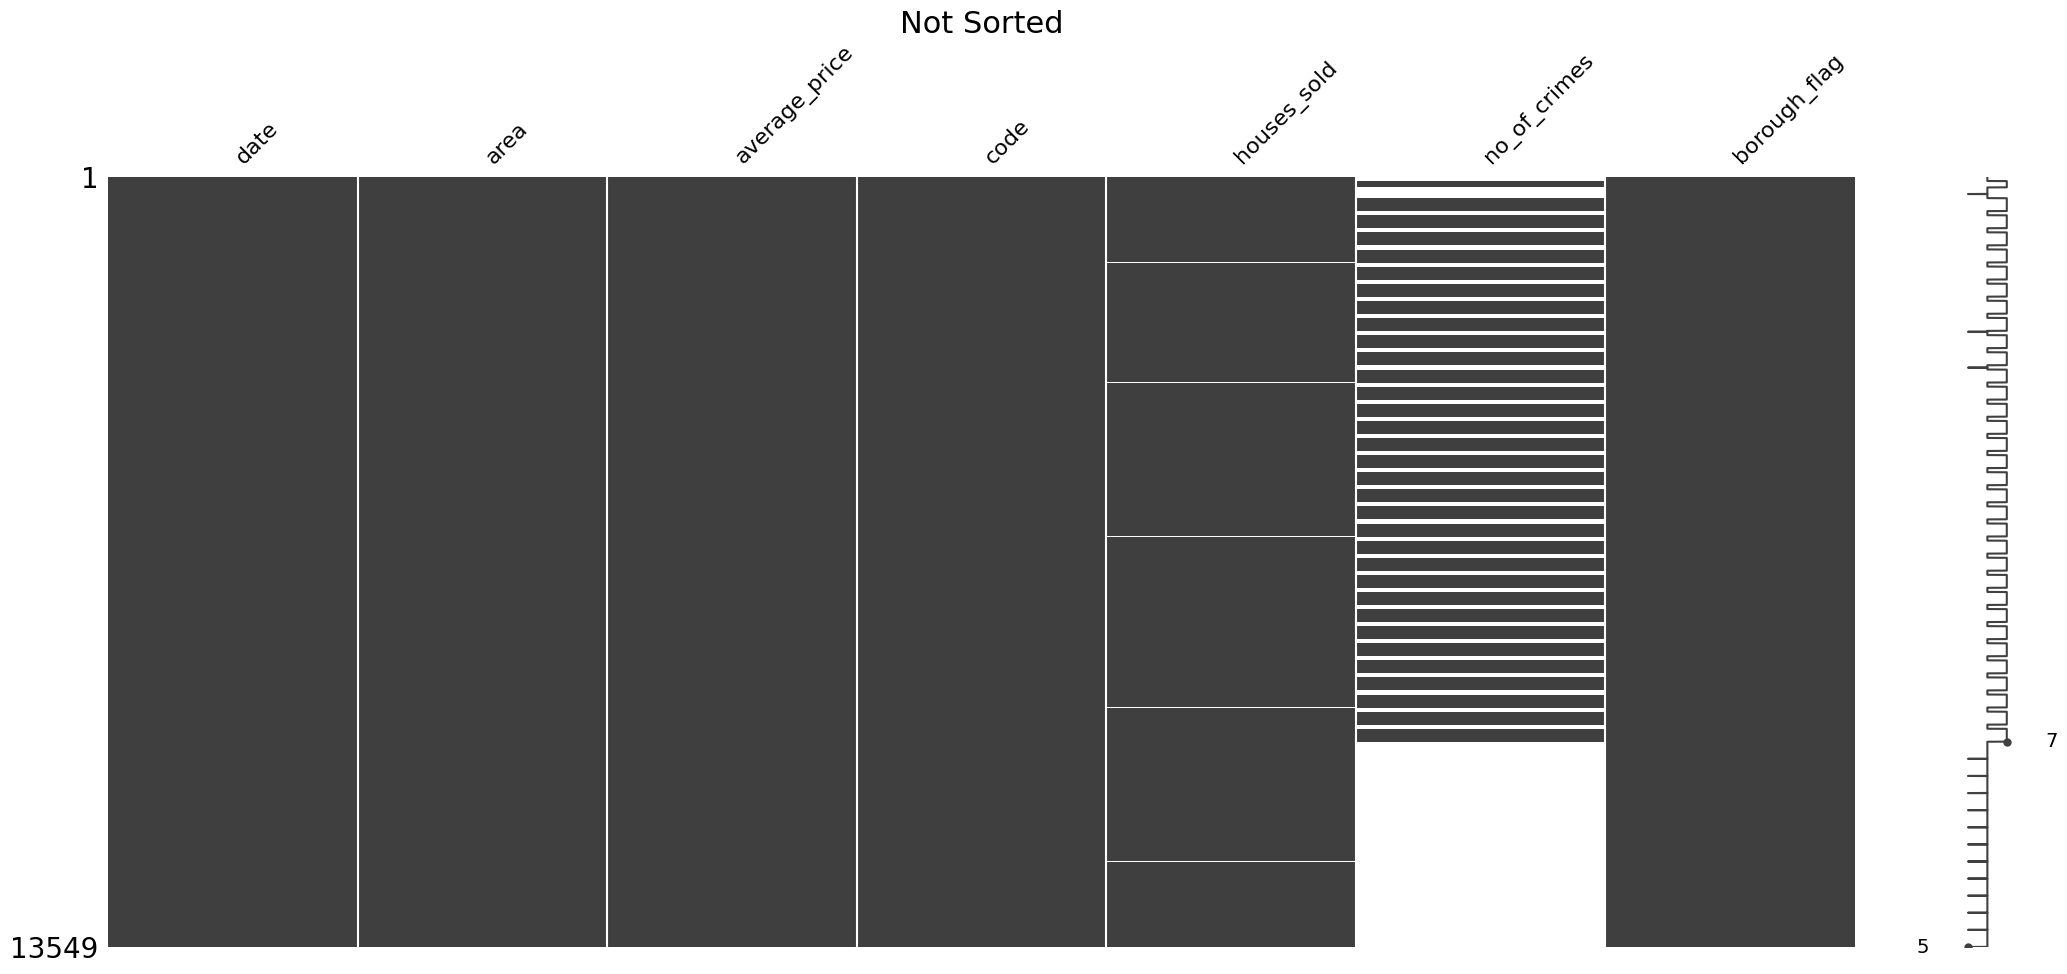

<Figure size 640x480 with 0 Axes>

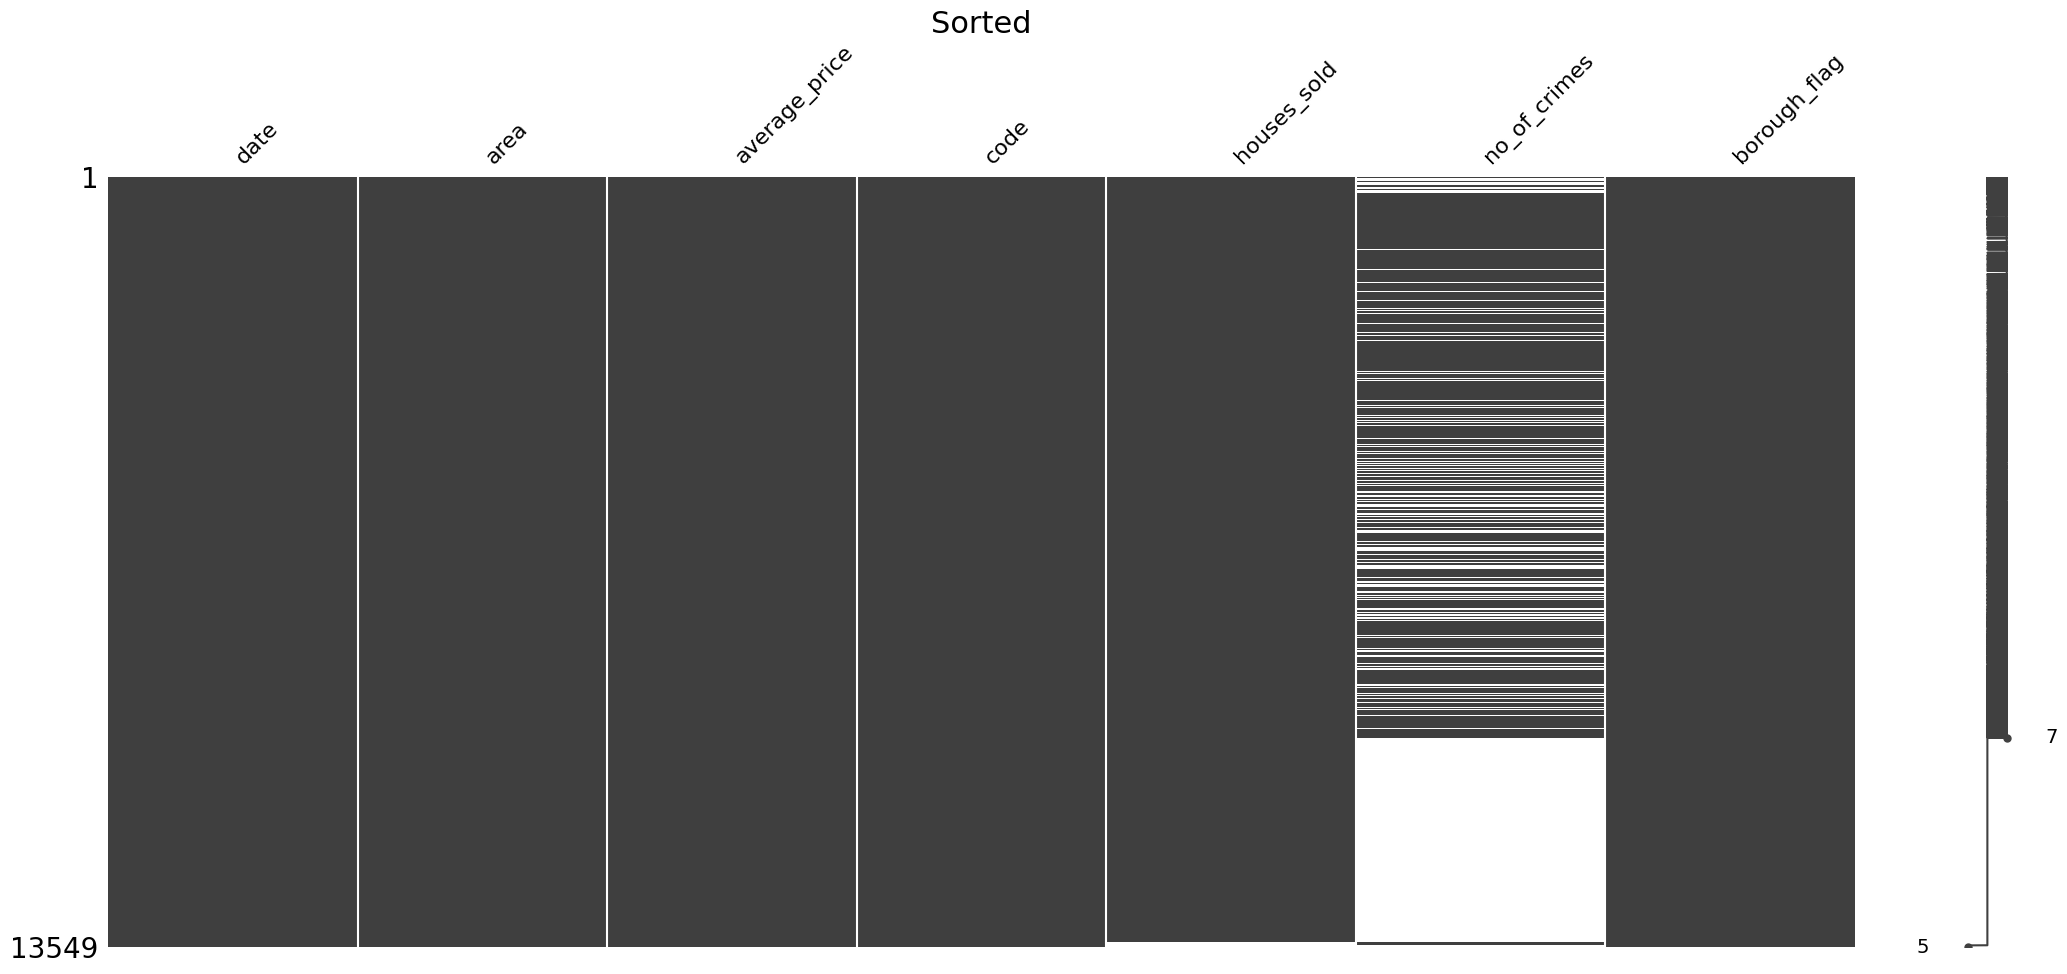

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

import missingno as mn

mn.matrix(df)
plt.title("Not Sorted",fontsize=22)
plt.figure()

mn.matrix(df.sort_values(by=["houses_sold","no_of_crimes"]))
plt.title("Sorted",fontsize=22)
plt.show()

In [6]:
# Remove unimportant attributes

        
# Split, impute, combine

# First group data by area
df_grouped = df.groupby(by=['area']) # perform the grouping of thing related to 'age'
func = lambda grp: grp.fillna(grp.mean()) # within groups, fill using median (define function to do this)
numeric_columns = ['average_price','houses_sold','no_of_crimes'] # only transform numeric columns
df_imputed_sic = df_grouped[numeric_columns].transform(func) # apply impute and transform the data back

# Extra step: fill any object columns that could not be transformed
col_deleted = list( set(df.columns) - set(df_imputed_sic.columns)) # in case the median operation deleted columns
df_imputed_sic[col_deleted] = df[col_deleted]

# drop any rows that still had missing values after grouped imputation
df_imputed_sic.dropna(inplace=True)

# 5. Rearrange the columns
df_imputed_sic.info()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9936 entries, 0 to 9937
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   average_price  9936 non-null   float64       
 1   houses_sold    9936 non-null   float64       
 2   no_of_crimes   9936 non-null   float64       
 3   area           9936 non-null   object        
 4   borough_flag   9936 non-null   bool          
 5   date           9936 non-null   datetime64[ns]
 6   code           9936 non-null   object        
dtypes: bool(1), datetime64[ns](1), float64(3), object(2)
memory usage: 553.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           13549 non-null  datetime64[ns]
 1   area           13549 non-null  object        
 2   average_price  13549 non-null  float

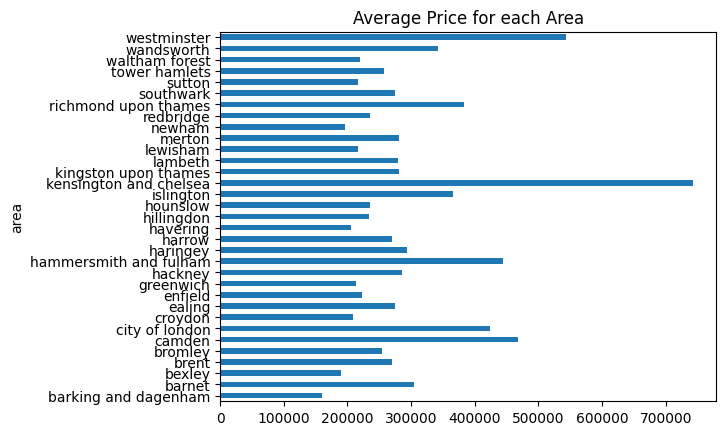

In [7]:
df_grouped = df_imputed_sic.groupby(by='area')
total_average_price = df_grouped.average_price.sum() / df_grouped.average_price.count()
ax = total_average_price.plot(kind='barh')
plt.title('Average Price for each Area')
plt.show()

This bar chart shows the average price of a house in each area since 1995. The areas with the most expensive houses include kensinton and chelsea, westminster, hammersmith and fullnam, the city of london, and camden. The least expensive areas include newham, lewisham, hillingdon, hackney, croydon, bexley, and barking and dagenham. Therefore, house buyers can look at this data to help better decide which areas align with their budget requirements, and real estate investors can use this data to decide which areas have the most and least expensive investments. This data is limited mainly to the fact that it does not adjust for inflation. 

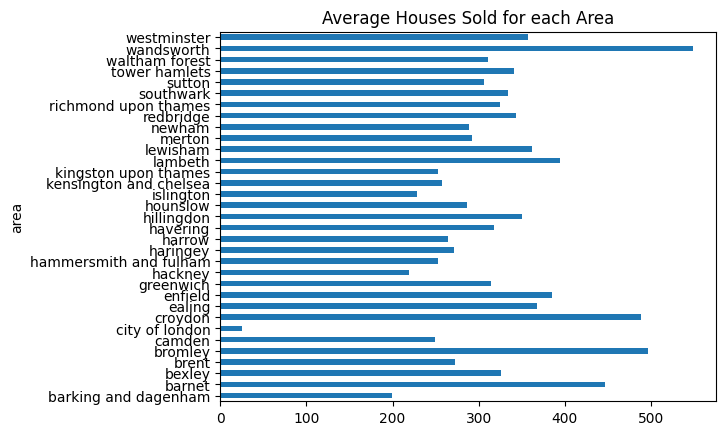

In [8]:
average_houses_sold = df_grouped.houses_sold.sum() / df_grouped.houses_sold.count()
ax = average_houses_sold.plot(kind='barh')
plt.title('Average Houses Sold for each Area')
plt.show()

This bar chart shows the average number of houses sold in each area since 1995. The areas with the most houses sold are wandsworth, croydon, camden, and barnet. The areas with the least number of houses sold are islington, hackney, the city of london, and barking and dagenham. Therefore, someone looking to buy a house could look at the areas with the most houses sold in order to increase their chances of finding a house. Real estate investors could also look into these areas in order to increase the odds they find a house to invest in. This data does not take into account the land size of each area. 

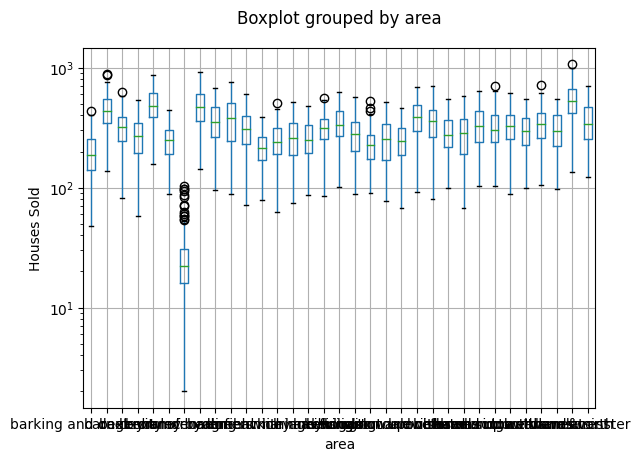

In [12]:
ax = df_imputed_sic.boxplot(column='houses_sold', by = 'area') # group by class
plt.ylabel('Houses Sold')
plt.title('')
ax.set_yscale('log')

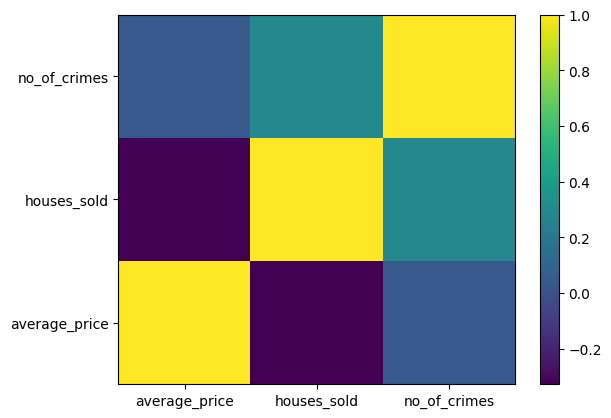

In [10]:
# plot the correlation matrix 
vars_to_use = ['average_price', 'houses_sold', 'no_of_crimes'] # pick vars
plt.pcolor(df_imputed_sic[vars_to_use].corr()) # do the feature correlation plot

# fill in the indices
plt.yticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.xticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.colorbar()
plt.show()

### Question: What variable greatest affects the average price of houses sold in an area?

According to the correlarion matrix above, the variable that affects the average price of houses the most is the number of houses sold. It appears that there is a slight negative correlation between the average price and the number of houses sold. This may likely be because as houses become more expensive, less people can afford the houses, thus causing less houses overall to be bought. Additionally, according to the correlation matrix, it seems that the number of crimes do not affect the average price of a house, which seems suprising as it would be expected that as the number of crimes increase, the average price of a house decreases. Therefore, home buyers and real estate investors should consider mostly the number of houses being sold in an area to better the understand the prices of the houses in that area. When determining solely the price, the third parties should not consider the number of crimes or assume that the number of crimes will greatly decrease the prices of houses. 

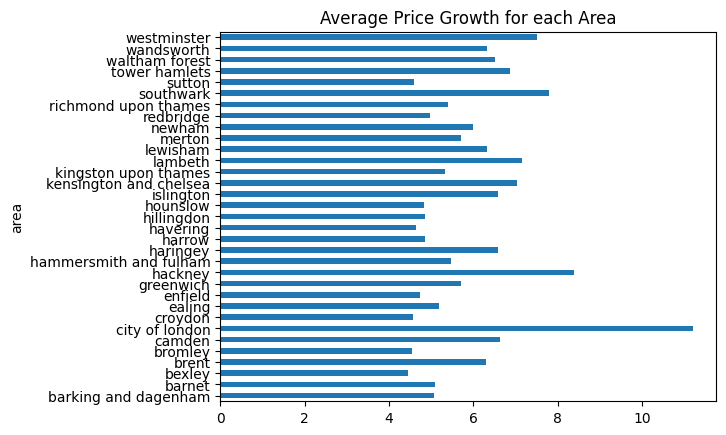

In [61]:

average_price_growth = (df_grouped.max(date).average_price - df_grouped.min(date).average_price) / df_grouped.min(date).average_price
ax = average_price_growth.plot(kind='barh')
plt.title('Average Price Growth for each Area')
plt.show()

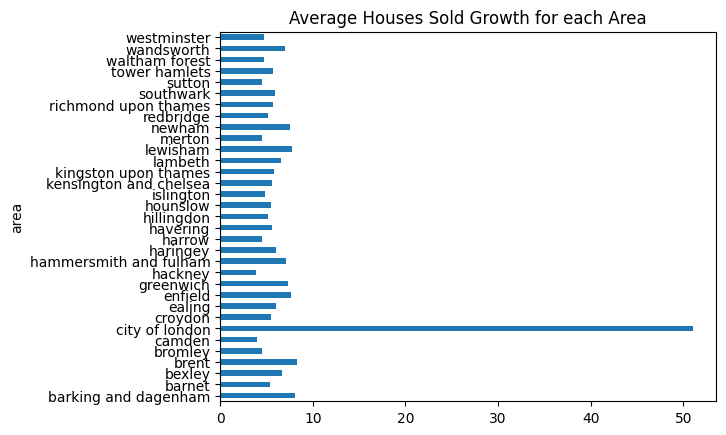

In [62]:
average_houses_sold_growth = (df_grouped.max(date).houses_sold - df_grouped.min(date).houses_sold) / df_grouped.min(date).houses_sold
ax = average_houses_sold_growth.plot(kind='barh')
plt.title('Average Houses Sold Growth for each Area')
plt.show()

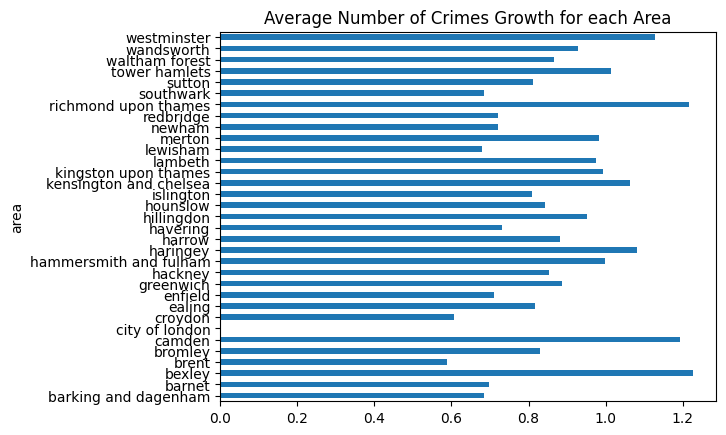

In [63]:
average_no_of_crimes_growth = (df_grouped.max(date).no_of_crimes - df_grouped.min(date).no_of_crimes) / df_grouped.min(date).no_of_crimes
ax = average_no_of_crimes_growth.plot(kind='barh')
plt.title('Average Number of Crimes Growth for each Area')
plt.show()

### Question: Which areas would be best to live in for the future?

Accoring to the "Average Price Growth for each Area" graph, we can get an understanding for which areas are increasing their housing prices the most. Areas such as westminister, southwark, hackney, and the city of london have seen the greastest price increase from 1995 to 2020. This means that for home buyers and real estate investors, these places might be strong candidates to look at because this data may suggest that the houses will continue to significantly increase in value after being purchased. In the "Average Houses Sold Growth for each Area" graph, the city of london sticks out as an area that has been rapidly increasing in the number of houses sold from 1995 to 2020. If a home buyer is looking for a place that is also rapidly growing in population, then places like the city of london may be strong candidates. From the "Average Number of Crimes Growth for each Area" graph, we see that places such as westminister, richmond upon thames, camden, and bexley have seen the most increase in crimes. We know from the correlation matrix that the number of crimes does not impact the price of houses, so third parties should not be concerned about the impact of crime increase when looking at the price of houses in each area. However, this data may be important in case an increase in crime is a personal problem for third parties. 

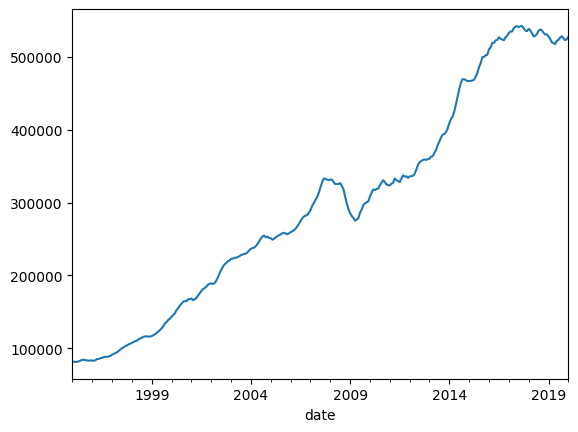

In [75]:
df_grouped2 = df_imputed_sic.groupby(by='date')
monthly_average_price = df_grouped2.average_price.sum() / df_grouped2.average_price.count()
lines = monthly_average_price.plot.line()


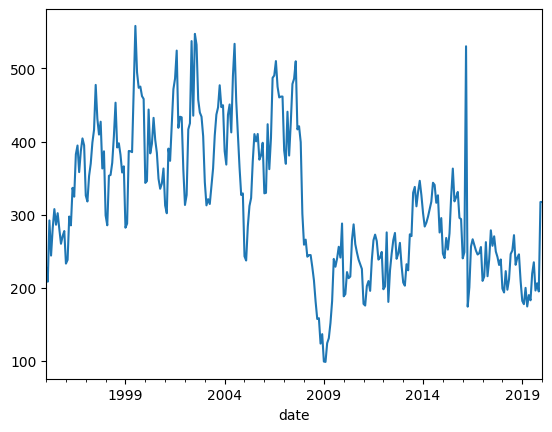

In [76]:
monthly_average_houses_sold = df_grouped2.houses_sold.sum() / df_grouped2.houses_sold.count()
lines = monthly_average_houses_sold.plot.line()

### Question: Is now even a good time to buy a house?

The monthly average price time series graph shows a general positive trend in the price of houses. However, starting around 2016, it appears to flatten and eventually decreases slightly. Therefore, it may be wise for home buyers to wait until the trend starts increasing again to buy a house. That way, home buyers can ensure that their house continues to increase in value after they have bought it. This may also give real estate investors a caution before investing in real estate to ensure that they do not create a loss. This data may be useful to the london government, as it may provide valuable incentive for the london government to start exploring variables that may have caused this flatlining of housing prices to occur. The monthly average houses sold further supports how currently, many potential home buyers have not bought homes recently. It seems that the economy is still recovering from the 2008 global recession, and that it will still take longer for the monthly average houses sold to recover to the level it was at before the recession. Therefore, many potential home buyers have already came to the conclusion that now is not the best time to purchase a home. Because of these graphs, it is evident that investing or purchasing a home may not be good decision at the moment until the housing market fully recovers. 


### References:

Dataset: https://www.kaggle.com/datasets/justinas/housing-in-london?resource=download